In [2]:
import subprocess 
import numpy as np
import correlation_functions
import matplotlib.pyplot as plt
import os

In [14]:
pacc_transform = lambda process: float(process.communicate()[1].decode().replace('acc = ','')) #lambda function to transform the cerr 

L = 10
# beta = 1/(sci py.constants.Boltzmann*273)
beta = 0.01
thermalization = 0
steps = 10000
measure_every = 10

outfile_ising_metro = 'ising_metro_output'
subprocess.run('g++ -std=c++11 -O3 ising_metro.cc -o ising_metro.out', shell=True)
process = subprocess.Popen('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' > ' + outfile_ising_metro, shell=True, stderr=subprocess.PIPE)
pacc = pacc_transform(process) #da un risultato diverso da quello della console
print(pacc)

outfile_ising_gibbs = 'ising_gibbs_output'
subprocess.run('g++ -std=c++11 -O3 ising_gibbs.cc -o ising_gibbs.out', shell=True)
process = subprocess.Popen('./ising_gibbs.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' > ' + outfile_ising_gibbs, shell=True, stderr=subprocess.PIPE)
pacc = pacc_transform(process) #da un risultato diverso da quello della console
print(pacc)

0.985005
0.499786


In [15]:
ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)
ising_gibbs = np.loadtxt(outfile_ising_gibbs, unpack=True)

correlation_metro = [correlation_functions.Correlation(ising_metro, ising_metro, offset=i) for i in range(0, 200)]
correlation_gibbs = [correlation_functions.Correlation(ising_gibbs, ising_gibbs, offset=i) for i in range(0, 200)]

autocorrelationTime_metro = []
for tau in range(1, 200):
    temp_metro = 1/2
    for i in range(1,tau):
        temp_metro += correlation_functions.Correlation(ising_metro, ising_metro, offset=i)
    autocorrelationTime_metro.append(temp_metro)

autocorrelationTime_gibbs = []
for tau in range(1, 200):
    temp_gibbs = 1/2
    for i in range(1,tau):
        temp_gibbs += correlation_functions.Correlation(ising_gibbs, ising_gibbs, offset=i)
    autocorrelationTime_gibbs.append(temp_gibbs)



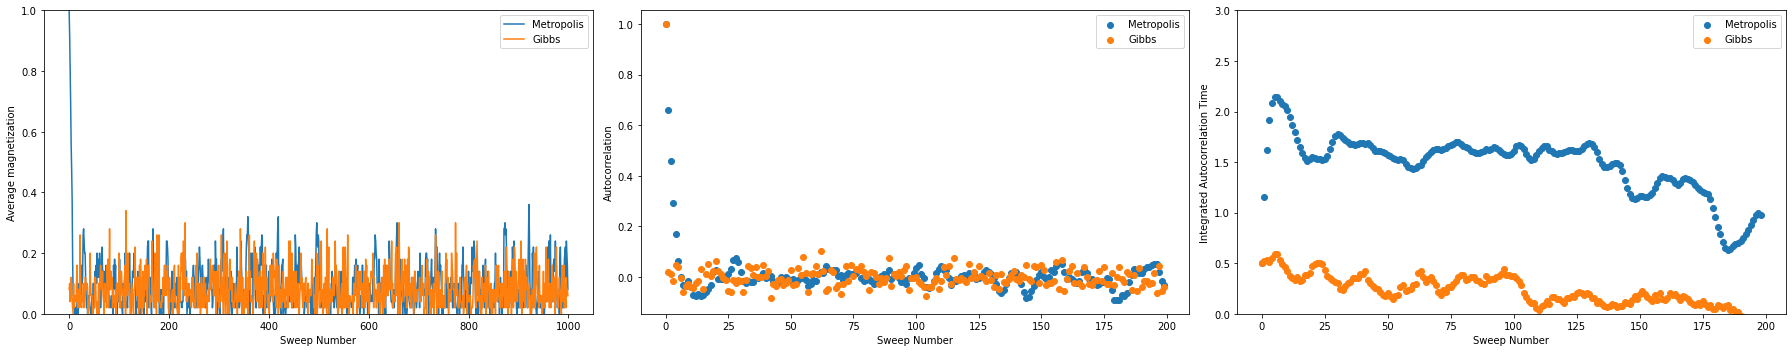

In [16]:
fig, ax = plt.subplots(1,3, figsize=(25, 5), tight_layout=True)

ax[0].plot(ising_metro, label = "Metropolis")
ax[0].plot(ising_gibbs, label = "Gibbs")
## add error estimate
ax[0].set_ylim(0,1)
# ax[1].set_ylim(0,1)

ax[0].set_ylabel('Average magnetization')
ax[1].set_ylabel('Autocorrelation')
ax[2].set_ylabel('Integrated Autocorrelation Time')

ax[0].set_xlabel('Sweep Number')
ax[1].set_xlabel('Sweep Number')
ax[2].set_xlabel('Sweep Number')
ax[1].scatter(range(0, len(correlation_metro)), correlation_metro, label = "Metropolis")
ax[1].scatter(range(0, len(correlation_gibbs)), correlation_gibbs, label = "Gibbs")
ax[2].scatter(range(0, len(autocorrelationTime_metro)), autocorrelationTime_metro, label = "Metropolis")
ax[2].scatter(range(0, len(autocorrelationTime_gibbs)), autocorrelationTime_gibbs, label = "Gibbs")
ax[2].set_ylim(0,3)
ax[0].legend()
ax[1].legend()
ax[2].legend()

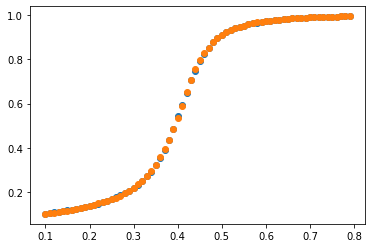

In [17]:
##get beta of transition
max_beta = 80
min_beta = 10
beta_list = []
average_magnetization_list_metro = []
average_magnetization_list_gibbs = []
steps=100000
for i in range(min_beta, max_beta,1):
    beta = i/100
    outfile_ising_gibbs = 'ising_gibbs_output'+str(i)
    outfile_ising_metro = 'ising_metro_output'+str(i)
    try:
        os.remove('/Users/salvatore_air/Dropbox/MM837/tutorials_assignments/wk46/'+outfile_ising_metro)
        os.remove('/Users/salvatore_air/Dropbox/MM837/tutorials_assignments/wk46/'+outfile_ising_gibbs)
    except(OSError):
        subprocess.run('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' > ' + outfile_ising_metro, shell=True)
        subprocess.run('./ising_gibbs.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + str(thermalization) + ' ' + str(steps) + ' ' + str(measure_every) + ' > ' + outfile_ising_gibbs, shell=True)
    ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)
    ising_gibbs = np.loadtxt(outfile_ising_gibbs, unpack=True)
    
    average_magnetization_list_metro.append(np.average(ising_metro))
    average_magnetization_list_gibbs.append(np.average(ising_gibbs))
    beta_list.append(beta)
    # print(i)
    # ax[i].plot(ising_metro, label = "Beta = " + str(beta))
    # ax[i-29].plot(ising_gibbs, label = "Beta = " + str(beta))
    # ax[i-29].set_ylim(-0.1,1.1)
    # ax[i-29].legend()
    # ax[i-29].axhline(y=0, color='black')
    # ax[i-29].axhline(y=1, color='black')


plt.scatter(beta_list, average_magnetization_list_metro)
plt.scatter(beta_list, average_magnetization_list_gibbs)

